<a href="https://colab.research.google.com/github/yl540016/PortfolioProjects/blob/main/Customer_Dataset_Explore_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perfoming data visualization and exploration on a customer shobbing dataset obtained from kaggle.
https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset?select=customer_shopping_data.csv 

Carried out basic data handling steps including loading the data, examining the information, checking for null values, followed by EDA using various visualization techniques like bar plots, pie charts, tables, boxplots, and histograms to identify patterns and ask relevant data science questions.

Post EDA, I'm planning to perform clustering techniques after converting categorical colums to numerical and standardizing the data, followed by applying clustering algorithms.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import cycle
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
color = plt.rcParams["axes.prop_cycle"].by_key()['color']
color_cycle=cycle(plt.rcParams["axes.prop_cycle"].by_key()['color'])

In [4]:
store=pd.read_csv('./customer_shopping_data.csv')

In [5]:
store.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [6]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


## Explore Data Analysis

1. Visualize the descriptive statistics
2. Visualize the Pairplot
3. Visualize the histplots,nunique values

In [7]:
store.describe().T.style.background_gradient(axis=1, cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
age,99457.000000,43.427089,14.990054,18.000000,30.000000,43.000000,56.000000,69.000000
quantity,99457.000000,3.003429,1.413025,1.000000,2.000000,3.000000,4.000000,5.000000
price,99457.000000,689.256321,941.184567,5.230000,45.450000,203.300000,1200.320000,5250.000000


In [8]:
# Check the null values in the dataset
store.isna().sum()/len(store)

invoice_no        0.0
customer_id       0.0
gender            0.0
age               0.0
category          0.0
quantity          0.0
price             0.0
payment_method    0.0
invoice_date      0.0
shopping_mall     0.0
dtype: float64

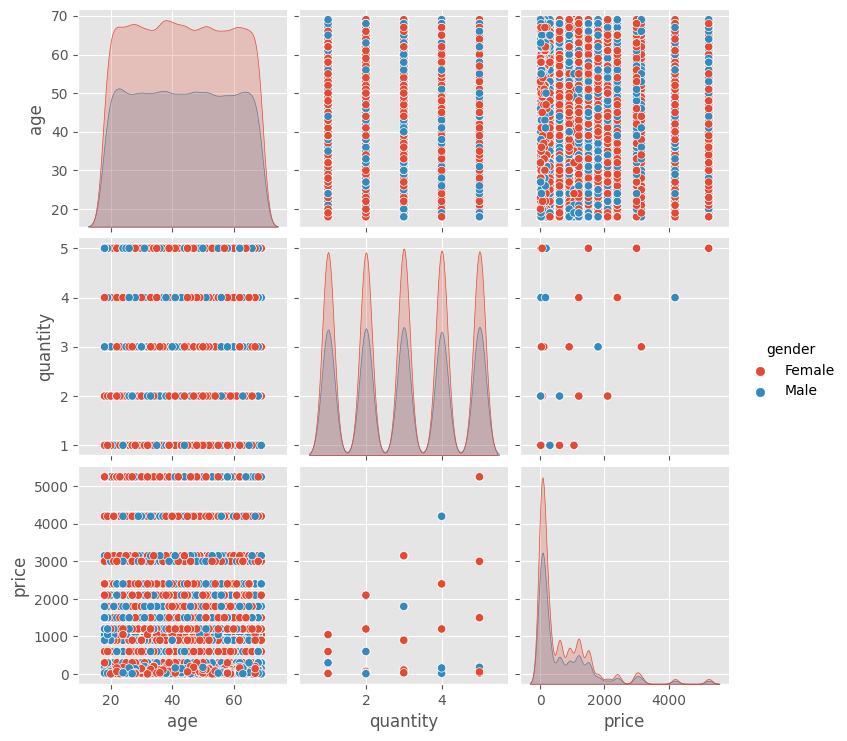

In [9]:
sns.pairplot(store,hue='gender')

In [10]:
# Cehck the unique columns
for i in store.columns:
  print(i,'-->', store[i].nunique())

invoice_no --> 99457
customer_id --> 99457
gender --> 2
age --> 52
category --> 8
quantity --> 5
price --> 40
payment_method --> 3
invoice_date --> 797
shopping_mall --> 10


In [12]:
print("The gender in the dataset", end='')
print(store['gender'].unique())

print("The category in the dataset", end='')
print(store['category'].unique())

print("The payment_method in the dataset", end='')
print(store['payment_method'].unique())

print("The shoppping_mall in the dataset", end='')
print(store['shopping_mall'].unique())


The gender in the dataset['Female' 'Male']
The category in the dataset['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
The payment_method in the dataset['Credit Card' 'Debit Card' 'Cash']
The shoppping_mall in the dataset['Kanyon' 'Forum Istanbul' 'Metrocity' 'Metropol AVM' 'Istinye Park'
 'Mall of Istanbul' 'Emaar Square Mall' 'Cevahir AVM' 'Viaport Outlet'
 'Zorlu Center']


<Axes: >

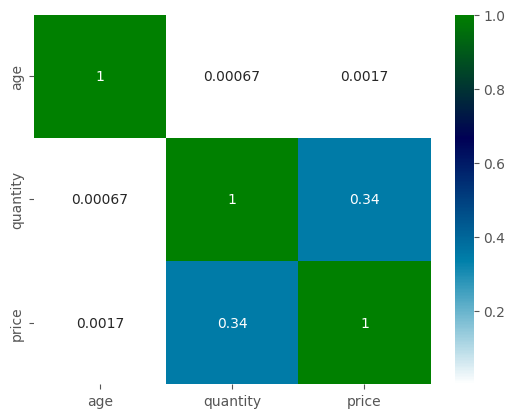

In [13]:
sns.heatmap(store.corr(),annot=True,cmap='ocean_r')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'quantity'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

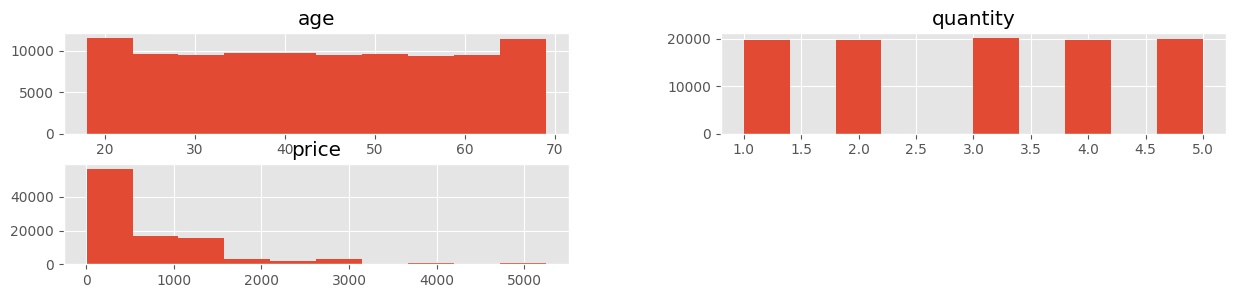

In [14]:
store.hist(figsize=(15,3))

## Box plot and violinplot

For Numerical columns to visualize the box plot and violinplot using iteration

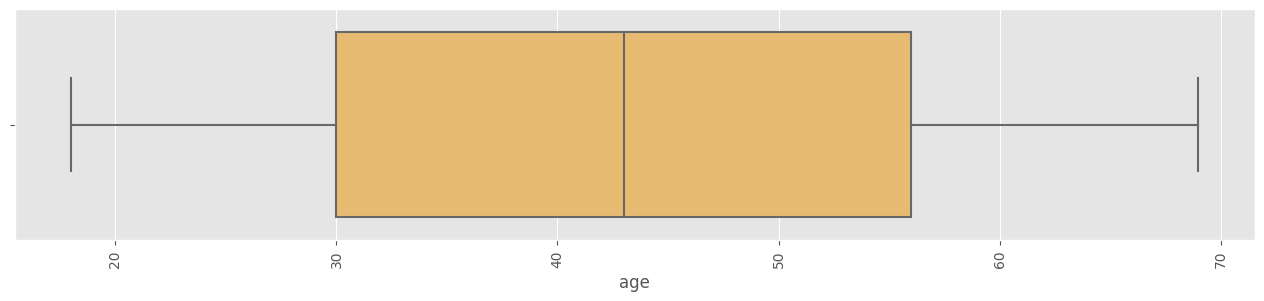

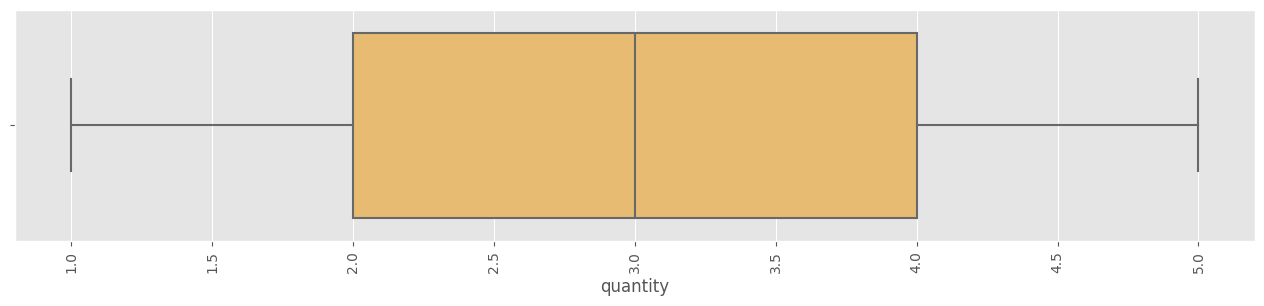

In [16]:
# Visualize the box plot
for i in store.select_dtypes(include='int'):
  plt.figure(figsize=(16,3))
  sns.boxplot(x=store[i], data=store, color=color[4])
  plt.xticks(rotation=90)
  plt.show()

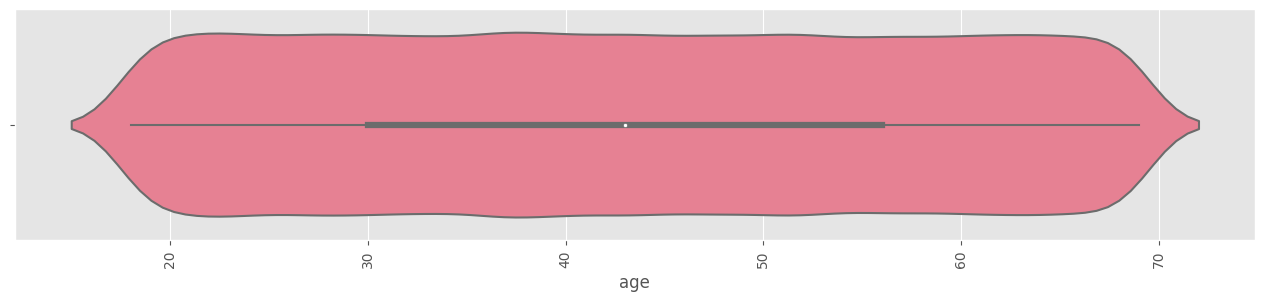

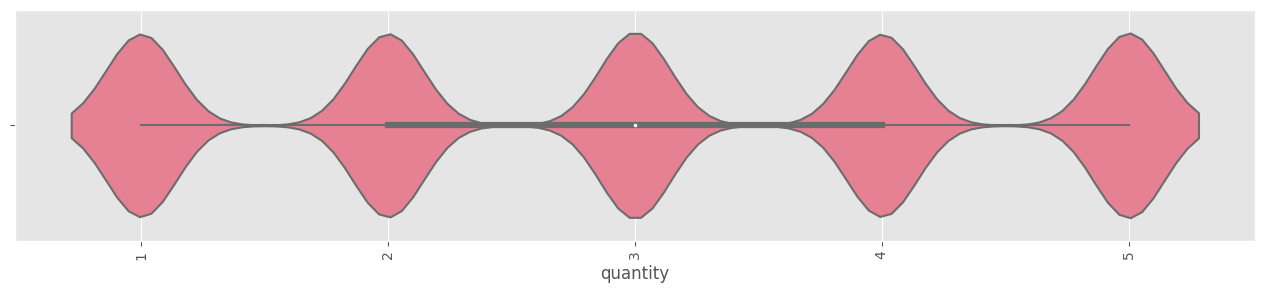

In [18]:
# Visualize the violin plot
for i in store.select_dtypes(include='int'):
  plt.figure(figsize=(16,3))
  sns.violinplot(x=store[i], data=store, color=color[4], palette='husl')
  plt.xticks(rotation=90)
  plt.show()

## Count of the category and visualize with matplotlib

Text(0, 0.5, 'Count of the Value')

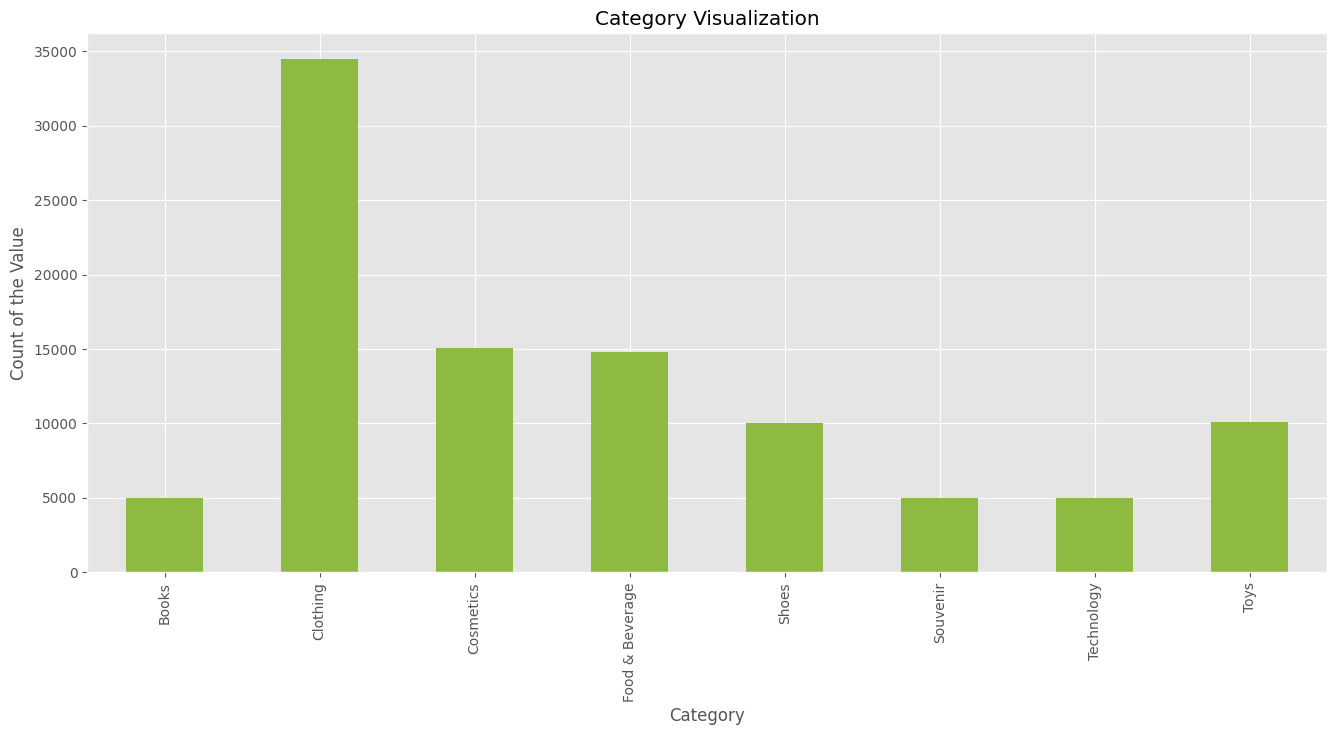

In [19]:
# Visualize the category in the dataset
ax = store['category'].value_counts()\
.sort_index()\
.plot(kind='bar', title="Category Visualization", figsize=(16,7), color =color[5], lw=5)
ax.set_xlabel("Category")
ax.set_ylabel("Count of the Value")

Text(0.5, 1.0, 'Gender percentage in the data')

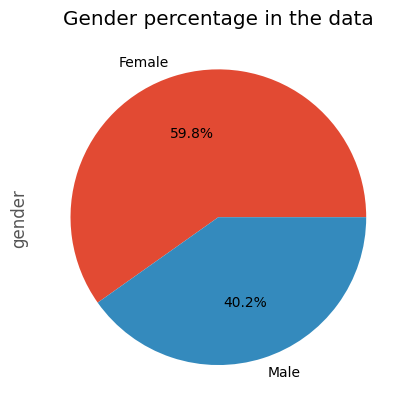

In [30]:
# Visualize the gender 
gender = store['gender'].value_counts()\
.plot(kind='pie', labels=store['gender'].value_counts().index, autopct='%1.1f%%')
plt.title('Gender percentage in the data')

## Question asked about the data

* Calculate the each age with gender wise and do some background style
* Create distplot to visualize the price with hue values as gender

In [33]:
# Calculate the age with gender
store.groupby('age')['gender'].value_counts()\
.sort_index()\
.unstack()\
.style.background_gradient(axis=0, cmap='YlOrRd')

gender,Female,Male
age,,
18,1079,765
19,1133,803
20,1102,742
21,1166,781
22,1208,843
23,1095,802
24,1155,822
25,1144,719
26,1156,740


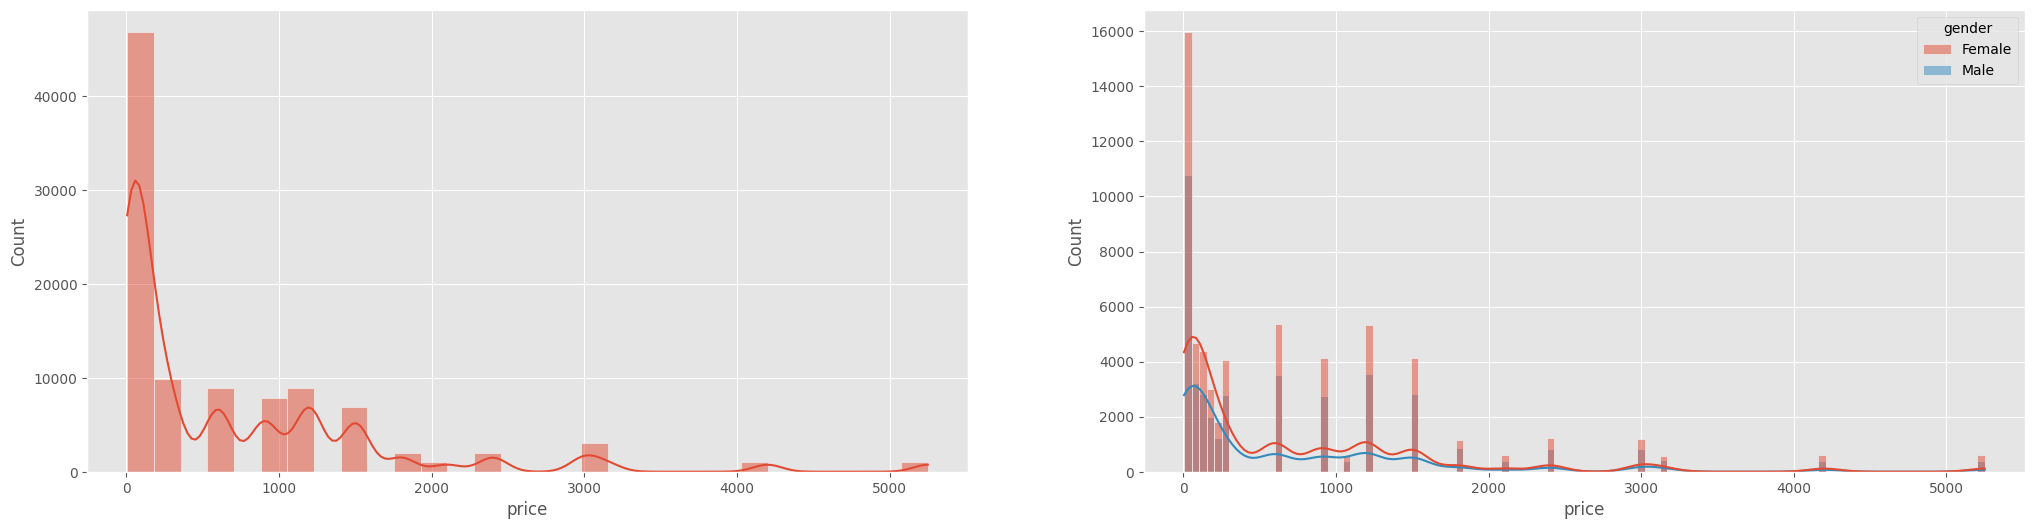

In [34]:
# Distribution of the price along with gender
plt.subplots(1,2,figsize=(25,6))
plt.subplot(121)
sns.histplot(data=store,bins=30,x='price', kde=True)
plt.subplot(122)
sns.histplot(data=store,x='price', kde=True,hue='gender')
plt.show()

## Function creating

* Created a function that creates a new columns which convert categorical with given condition
1. if age>=65 senior aged
2. age >= 45 middle aged
3. adult age

In [37]:
# Function that converts the ange numerical to adult age
def ages(a):
  if a>=65:
    return "Senior aged person"
  elif a>=45:
    return "Middle aged person"
  else:
    return "Adult aged person"
store['age_category']=store['age'].apply(ages)


In [39]:
store.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_category
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,Adult aged person
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,Adult aged person
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,Adult aged person
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,Senior aged person
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,Middle aged person


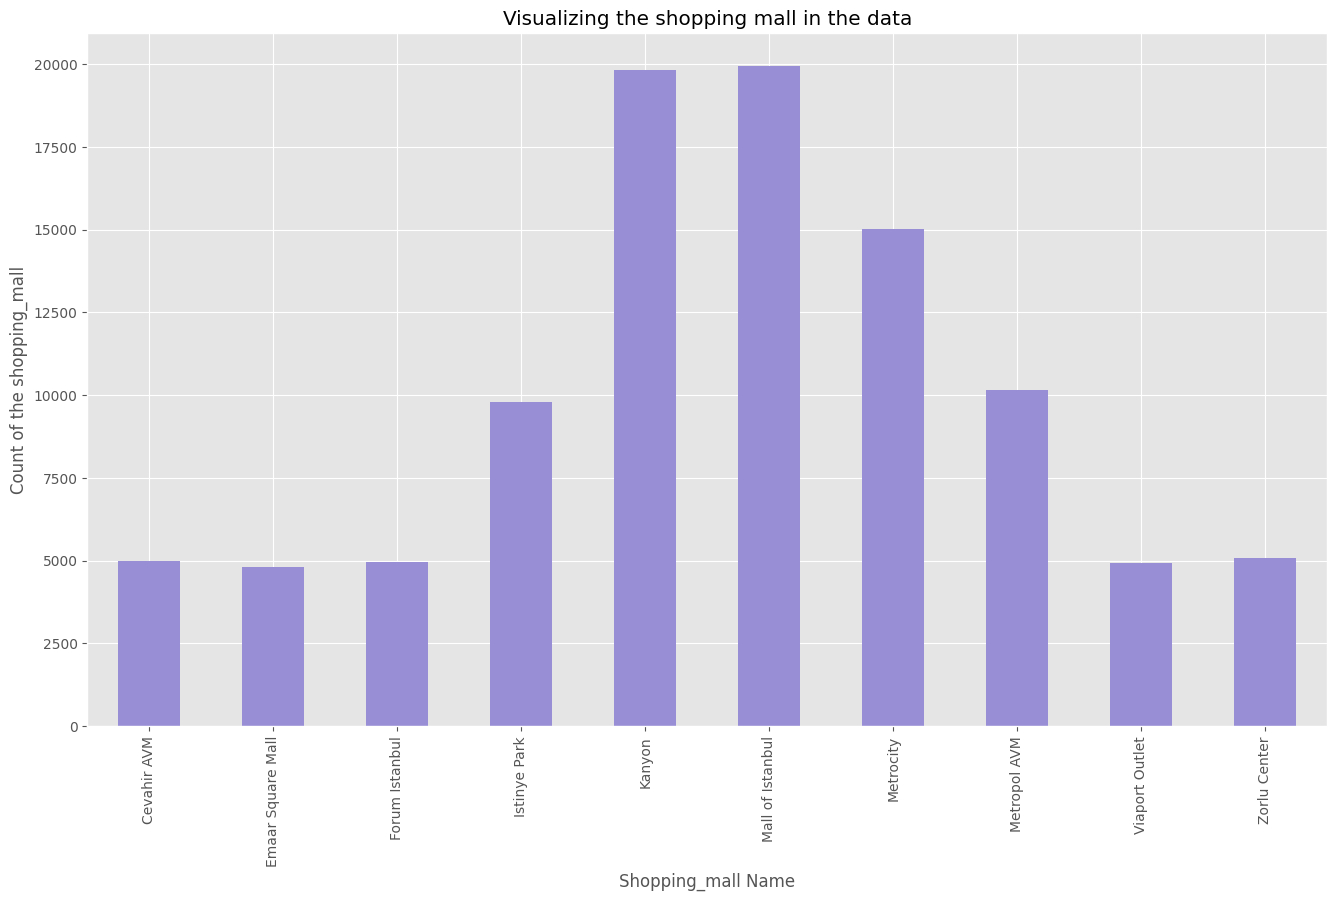

In [40]:
# Visualizing the shopping mall
shopping = store['shopping_mall'].value_counts()\
.sort_index()\
.plot(kind='bar',color=color[2],title='Visualizing the shopping mall in the data', figsize=(16,9))
shopping.set_xlabel("Shopping_mall Name")
shopping.set_ylabel("Count of the shopping_mall")
plt.show()

1. Found the payment method with categorys using group by function with background color
2. Identified which shopping mall receive more price
3. Find the price of the each shopping mall with different category
4. Took the invoice data and extracted the date, year, months
5. What extracted in the year columns visuzliaed it
6. Then visualized the each shopping mapp price with different payment method
7. Which aged person do more shopping with category wise

In [41]:
# Find the total amount of the each categories with the payment method
store.groupby('payment_method')['category'].value_counts()\
.sort_index()\
.unstack()\
.style.background_gradient(axis=0,cmap="RdBu_r")

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
payment_method,,,,,,,,
Cash,2268,15456,6674,6587,4474,2211,2235,4542
Credit Card,1696,12025,5336,5250,3553,1770,1753,3548
Debit Card,1017,7006,3087,2939,2007,1018,1008,1997


Text(0.5, 0, 'Shopping_mall')

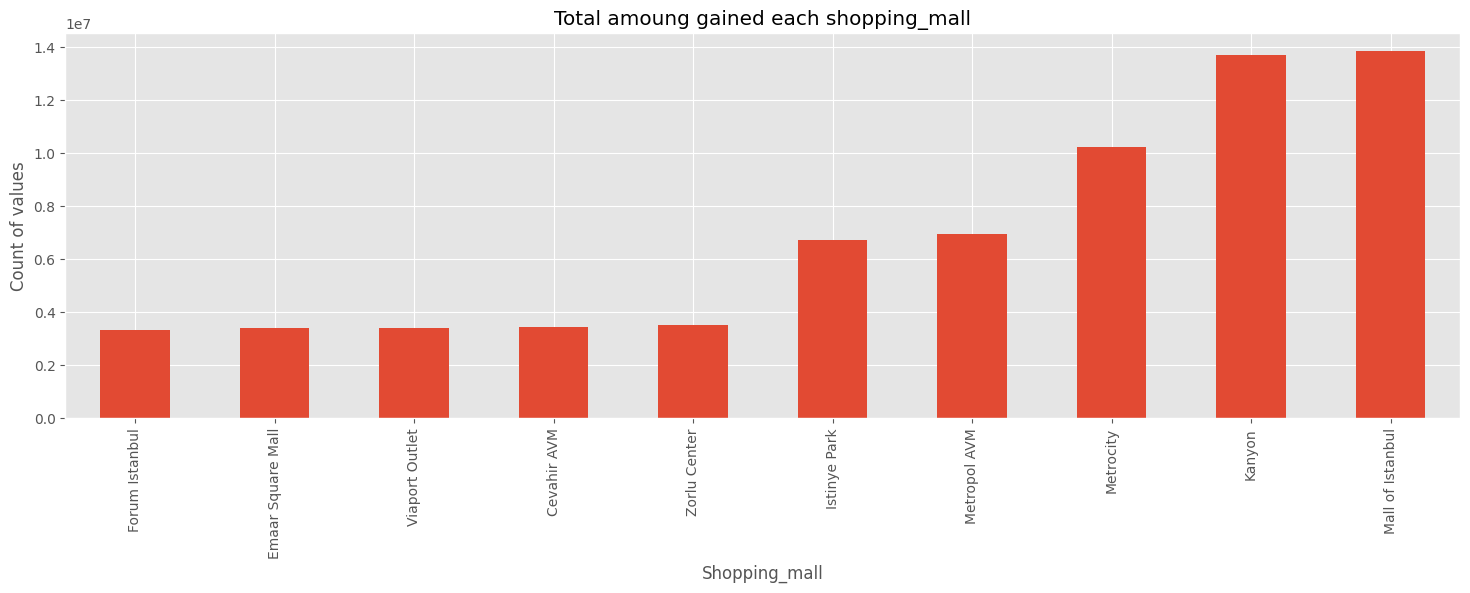

In [42]:
# Find the each shopping mall sales with price
shopping_mall = store.groupby('shopping_mall')['price'].sum()\
.sort_index().sort_values(ascending=True)\
.plot(kind='bar',title='Total amoung gained each shopping_mall', figsize=(18,5))
shopping_mall.set_ylabel("Count of values")
shopping_mall.set_xlabel("Shopping_mall")

In [45]:
# Which shopping mall received more amount with category-wise
store.groupby(['shopping_mall', 'category'])[['price']].sum()\
.sort_index()\
.unstack()\
.style.background_gradient(axis=0,cmap='cubehelix')

In [46]:
# Extract the year with invoice_date
store['invoice_date']=pd.to_datetime(store['invoice_date'])
store['date'] = store['invoice_date'].dt.year
store['Month'] = store['invoice_date'].dt.month
store['Day'] = store['invoice_date'].dt.day

store.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_category,date,Month,Day
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,Adult aged person,2022,5,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,Adult aged person,2021,12,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,Adult aged person,2021,9,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,Senior aged person,2021,5,16
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,Middle aged person,2021,10,24


In [48]:
# Removed the invoice_date from the dataset
store.drop('invoice_date', axis=1).head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,age_category,date,Month,Day
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,Adult aged person,2022,5,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,Adult aged person,2021,12,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity,Adult aged person,2021,9,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM,Senior aged person,2021,5,16
4,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon,Middle aged person,2021,10,24


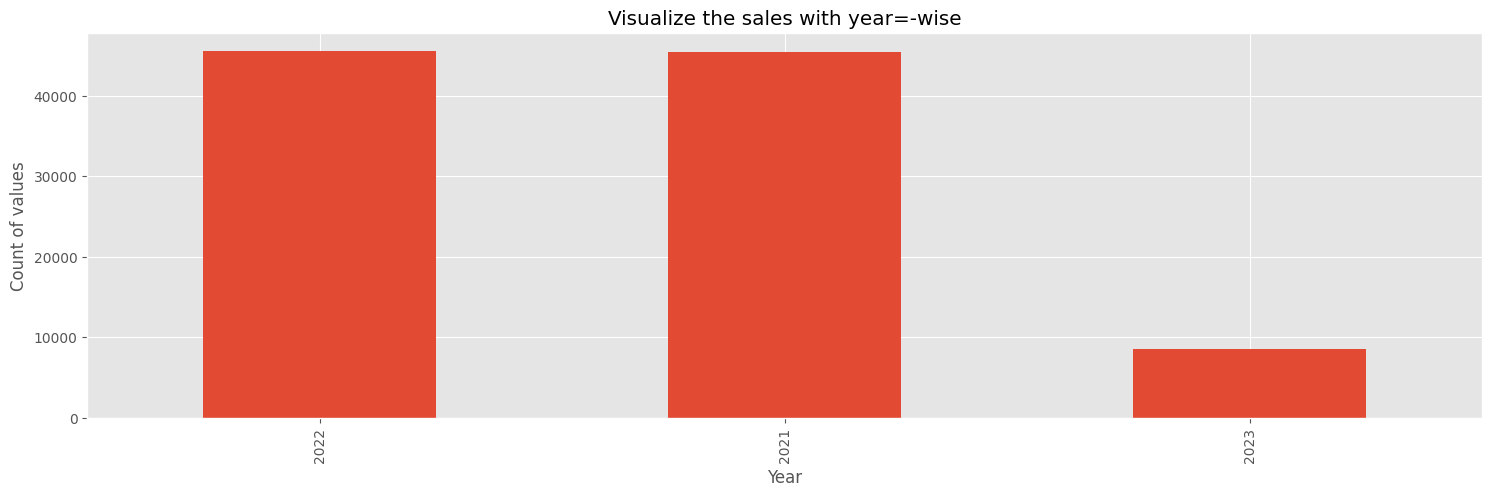

In [49]:
year = store['date'].value_counts()\
.plot(kind='bar',figsize=(18,5), title='Visualize the sales with year=-wise')
year.set_xlabel('Year')
year.set_ylabel('Count of values')
plt.show()

In [50]:
# Shopping mall with the payment method with price
payment_store = store.groupby(['payment_method', 'shopping_mall'])[['price']].sum()\
.sort_index()\
.unstack()\
.style.background_gradient(axis=0,cmap='vlag_r')
payment_store

<Axes: title={'center': 'Each shopping mall total price with different payment methods'}, xlabel='payment_method'>

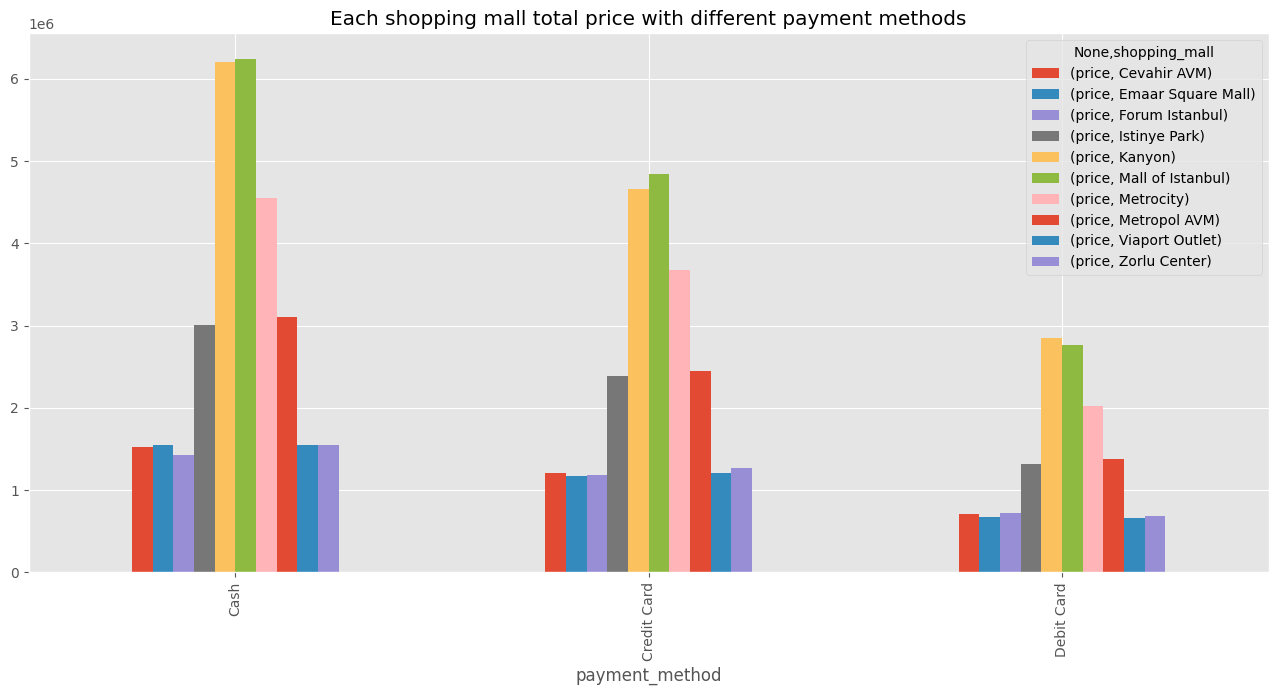

In [53]:
store.groupby(['payment_method', 'shopping_mall'])[['price']].sum()\
.sort_index()\
.unstack()\
.plot(kind='bar',figsize=(16,7), title="Each shopping mall total price with different payment methods")

In [58]:
# Identify which group aged person most shopping done with categories
store.groupby('age_category')['category'].value_counts()\
.sort_index()\
.unstack()\
.style.background_gradient(cmap='Reds')

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
age_category,,,,,,,,
Adult aged person,2570,18040,7802,7779,5196,2637,2653,5301
Middle aged person,1936,13206,5859,5594,3898,1898,1862,3799
Senior aged person,475,3241,1436,1403,940,464,481,987


<Axes: title={'center': 'quantity in the data'}>

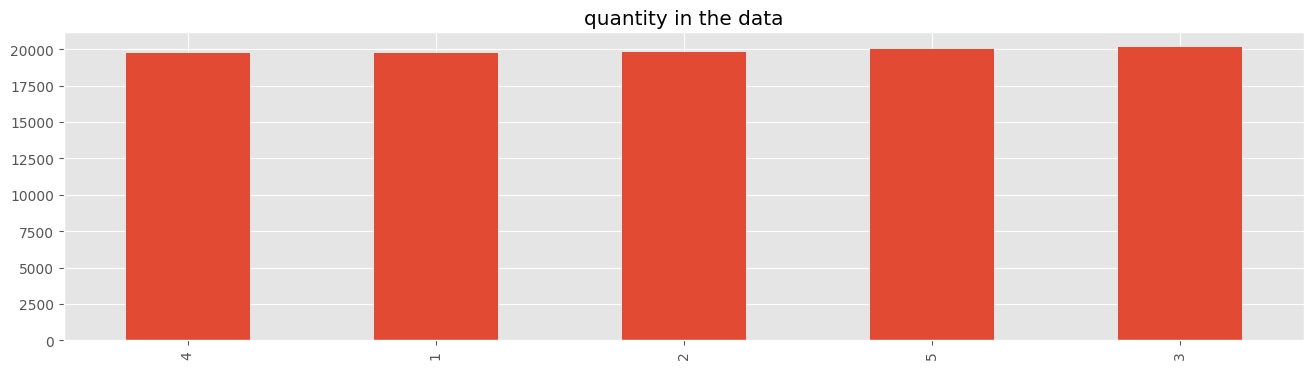

In [59]:
# Visualize the quantities in the dataset
store['quantity'].value_counts()\
.sort_values(ascending=True)\
.plot(kind='bar', title="quantity in the data", figsize=(16,4))

In [60]:
for i in store.select_dtypes("object"):
  store[i] = store[i].factorize()[0]

In [61]:
store = store.drop('invoice_date', axis=1)

## Clustering Method to solve the problem

In [62]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
label=LabelEncoder()
sc=StandardScaler()
x=sc.fit_transform(store)

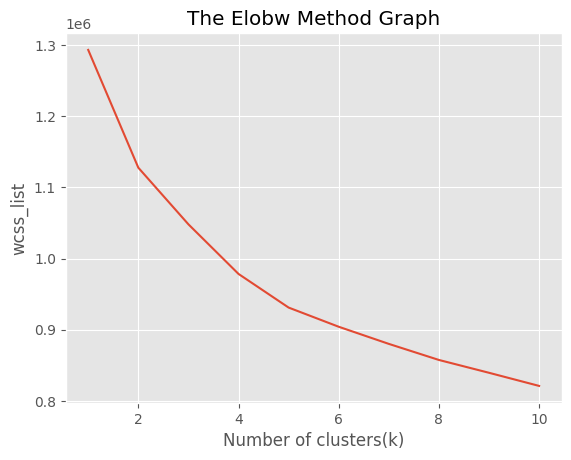

In [63]:
# K-means cluster method
from sklearn.cluster import KMeans
wcc_list=[]
for i in range(1,11):
  knn=KMeans(n_clusters=i,init='k-means++', random_state=42)
  knn.fit(x)
  wcc_list.append(knn.inertia_)
plt.plot(range(1,11),wcc_list)
plt.title("The Elobw Method Graph")
plt.xlabel("Number of clusters(k)")
plt.ylabel("wcss_list")
plt.show()

In [64]:
# Training the K-means model on a datset
kmeans=KMeans(n_clusters=2,init='k-means++', random_state=42)
y_predict=kmeans.fit_predict(x)

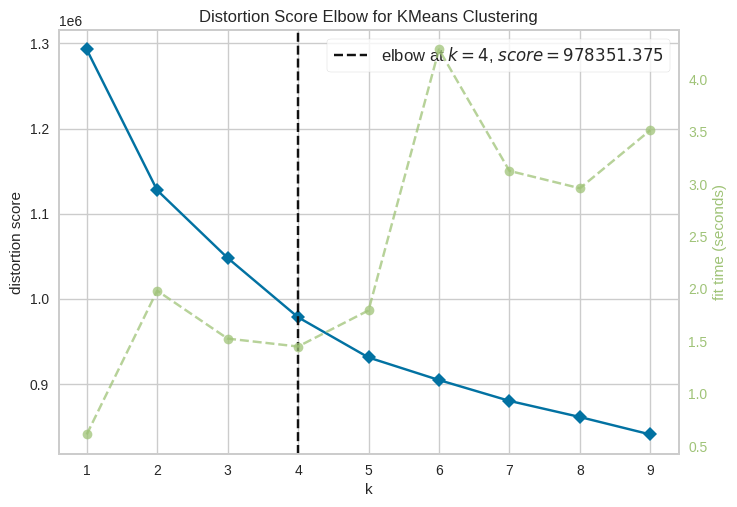

In [67]:
from yellowbrick.cluster import KElbowVisualizer
kmeans=KMeans()
visualize=KElbowVisualizer(kmeans, k=(1,10))
visualize.fit(x)
visualize.poof()
plt.show()